## 9_Sprint_9T01
### Practicant amb training i test sets
#### Eloi Canals

Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

#### Carreguem llibreries i el dataframe per estudiar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #, mpld3
import numpy as np

# sklearn
from sklearn.model_selection import train_test_split

df = pd.read_csv('DelayedFlights.csv', index_col=0)



/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### Separem els predictors del resultat de les operacions

In [3]:
X = df
y = df['ArrDelay']

X.drop('ArrDelay',axis=1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### Partim el dataset en grups per entrenar i per testejar.

In [4]:
# Partim el Dataset amb un criteri estandard de 66% training - 33% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1297627, 29) (639131, 29) (1297627,) (639131,)


In [5]:
print(X_train.shape, y_train.shape)

(1297627, 29) (1297627,)


In [6]:
print(X_test.shape, y_test.shape)

(639131, 29) (639131,)


In [7]:
y_test.head()

5905897    -5.0
2688262    11.0
5504770    37.0
1996081    29.0
4361041     6.0
Name: ArrDelay, dtype: float64

In [8]:
# Revisem a nivell descriptiu els dataframes resultants
X_test.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,639131.0,639131.000000,639131.000000,639131.000000,639131.000000,639131.000000,636774.000000,639131.000000,639131.000000,636336.000000,...,639131.000000,636774.000000,638977.000000,639131.000000,639131.000000,411705.000000,411705.000000,411705.000000,411705.000000,411705.000000
mean,2008.0,6.114141,15.761107,3.983845,1519.131760,1467.600332,1611.070557,1634.728359,2184.786124,133.373611,...,766.399711,6.813157,18.238354,0.000324,0.004049,19.204479,3.781275,15.011122,0.089780,25.220835
std,0.0,3.483434,8.771452,1.993136,450.225938,424.815360,548.013593,464.411222,1943.399380,72.102499,...,574.838005,5.223937,14.352612,0.017994,0.063505,43.389313,22.001986,33.751560,2.047013,41.911737
min,2008.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,1204.000000,1135.000000,1317.000000,1325.000000,612.000000,80.000000,...,338.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1545.000000,1510.000000,1716.000000,1707.000000,1544.000000,116.000000,...,607.000000,6.000000,14.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,8.000000
75%,2008.0,9.000000,23.000000,6.000000,1900.000000,1815.000000,2031.000000,2014.000000,3423.000000,165.000000,...,998.000000,8.000000,21.000000,0.000000,0.000000,21.000000,0.000000,14.000000,0.000000,33.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9742.000000,776.000000,...,4962.000000,207.000000,422.000000,1.000000,1.000000,1552.000000,1352.000000,1030.000000,357.000000,1184.000000


In [9]:
X_train.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1297627.0,1.297627e+06,1.297627e+06,1.297627e+06,1.297627e+06,1.297627e+06,1.292874e+06,1.297627e+06,1.297627e+06,1.292035e+06,...,1.297627e+06,1.292874e+06,1.297326e+06,1.297627e+06,1.297627e+06,835783.000000,835783.000000,835783.000000,835783.000000,835783.000000
mean,2008.0,6.109612e+00,1.574971e+01,3.985311e+00,1.518240e+03,1.467410e+03,1.609683e+03,1.633977e+03,2.184006e+03,1.332725e+02,...,7.653347e+02,6.812886e+00,1.822917e+01,3.282916e-04,3.981113e-03,19.167045,3.665294,15.026814,0.090313,25.333722
std,0.0,3.482109e+00,8.778646e+00,1.997359e+00,4.506128e+02,4.247430e+02,5.482588e+02,4.647447e+02,1.945344e+03,7.203917e+01,...,5.743030e+02,5.297884e+00,1.433160e+01,1.811585e-02,6.297037e-02,43.623306,21.237549,33.873142,2.010637,42.125161
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.542000e+03,1.160000e+02,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,8.000000
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.015000e+03,3.422000e+03,1.650000e+02,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,21.000000,0.000000,15.000000,0.000000,33.000000
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,1.114000e+03,...,4.962000e+03,2.400000e+02,3.930000e+02,1.000000e+00,1.000000e+00,2436.000000,1297.000000,1357.000000,392.000000,1316.000000


In [10]:
y_train.describe()

count    1.292035e+06
mean     4.219092e+01
std      5.682006e+01
min     -7.000000e+01
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [11]:
y_test.describe()

count    636336.000000
mean         42.218089
std          56.712928
min        -109.000000
25%           9.000000
50%          24.000000
75%          56.000000
max        1583.000000
Name: ArrDelay, dtype: float64

Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

#### Primer mirarem si hi ha i tractarem els valors NaNs.

In [12]:
display(df.isna().sum().to_frame().T)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,0,0,0,7110,0,0,0,...,7110,455,0,0,0,689270,689270,689270,689270,689270


#### Tractem els NaNs de ArrTime. Com son només 7110 files sobre 1936758, 
#### apliquem el criteri x columna
#### La resta de 679270 NaNs en les columnes de delays son NaNs que poden ser (i son) correctes
#### si no hi ha hagut delay per aquella circunstancia.

In [13]:
df.dropna(subset=["ArrTime"])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [14]:
print(df.shape)

(1936758, 29)


#### Ara crearem columnes numeriques a partir de les dades de Companyia Aeria

In [15]:
# Creació de columnes Dummies a partir del UniqueCarrier
dummies = pd.get_dummies(df['UniqueCarrier'])
dummies.head()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
# Merge dels dataframes dummies amb el df original
df_expanded = pd.concat([df,dummies], axis=1)
df_expanded.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,0,0,0,0,0,0,1,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,0,0,0,0,0,0,1,0,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,0,0,0,0,0,0,1,0,0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,0,0,0,0,0,0,1,0,0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,0,0,0,0,0,0,1,0,0


#### Estandaritzem les dades numeriques obtingudes

In [17]:
#Estandaritzem les dades numeriques
df_numerics = []

for column in df_expanded:
    if df_expanded[column].dtype == 'int64' or df_expanded[column].dtype == 'float64':
        df_numerics.append(column)

df_expanded[df_numerics]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,...,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,1621,147.0,...,906,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,1631,127.0,...,481,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,1631,162.0,...,689,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,1639,115.0,...,533,13.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN


In [18]:
# Estandaritzem les dades
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_estandarized = pd.DataFrame(scaler.fit_transform(df_expanded[df_numerics].values))
df_estandarized.columns = df_numerics

In [19]:
df_estandarized.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,-1.467635,-1.453177,0.007602,1.075431,1.147753,1.096103,1.271484,-0.950924,-0.073631,...,0.077137,-0.533408,-0.713616,-0.018082,-0.063401,NaN,NaN,NaN,NaN,NaN
1,0.0,-1.467635,-1.453177,0.007602,-1.697135,-1.724412,-1.109385,-1.364997,0.538251,-0.073631,...,0.077137,-0.343784,-0.574132,-0.018082,-0.063401,NaN,NaN,NaN,NaN,NaN
2,0.0,-1.467635,-1.453177,0.007602,-1.976834,-1.995149,-1.470582,-1.903054,-0.892817,-0.517705,...,-0.436371,-0.723032,-0.085936,-0.018082,-0.063401,NaN,NaN,NaN,NaN,NaN
3,0.0,-1.467635,-1.453177,0.007602,0.689181,0.676907,0.636398,0.625815,0.892547,-0.600969,...,-0.436371,-0.723032,-0.574132,-0.018082,-0.063401,-0.39451,-0.172316,-0.443993,-0.044562,0.1594
4,0.0,-1.467635,-1.453177,0.007602,0.935582,1.053584,0.931922,1.023977,-0.928812,-0.448319,...,-0.135229,-0.533408,-0.574132,-0.018082,-0.063401,NaN,NaN,NaN,NaN,NaN


Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [20]:
# Visualització estadistica i gràfica de les columnes basades en UniqueCarrier

In [21]:
col_names = list(dummies.columns)
col_names

['9E',
 'AA',
 'AQ',
 'AS',
 'B6',
 'CO',
 'DL',
 'EV',
 'F9',
 'FL',
 'HA',
 'MQ',
 'NW',
 'OH',
 'OO',
 'UA',
 'US',
 'WN',
 'XE',
 'YV']

In [22]:
plot_df = [dummies.sum()]
plot_df

[9E     51885
 AA    191865
 AQ       750
 AS     39293
 B6     55315
 CO    100195
 DL    114238
 EV     81877
 F9     28269
 FL     71284
 HA      7490
 MQ    141920
 NW     79108
 OH     52657
 OO    132433
 UA    141426
 US     98425
 WN    377602
 XE    103663
 YV     67063
 dtype: int64]

In [23]:
Totals_x_carrier = df.UniqueCarrier.value_counts()

carriers = pd.read_csv('AirlineCodesIATA.csv', index_col=0)

to_keep_c = ['Airline']
carriers_ok=carriers[to_keep_c]

# Borrar index duplicats
carriers_ok = carriers_ok[~carriers_ok.index.duplicated()]
newidx = carriers_ok.reindex()

myDic = carriers_ok.to_dict()

Totals_x_carrier.index = Totals_x_carrier.index.map(myDic['Airline'])

Totals_x_carrier.count()

20

In [24]:
myDic

{'Airline': {'0A': 'Amber Air',
  '0B': 'Blue Air',
  '0C': 'IBL Aviation',
  '0D': 'Darwin Airline',
  '0J': 'Jetclub',
  '0V': 'Vietnam Air Services Company (VASCO)',
  '1A': 'Amadeus IT Group S.A.',
  '1B': 'Sabre travel network Asia-Pacific (ex-Abacus)',
  '1C': 'Electronic Data Systems',
  '1D': 'Radixx',
  '1E': 'Travelsky',
  '1F': 'Infini travel information, Inc.',
  '1G': 'Travelport (Galileo core)',
  '1H': 'Sirena travel',
  '1I': 'Deutsche Rettungsflugwacht',
  '1J': 'Axess international network, Inc.',
  '1K': 'AIRKIOSK',
  '1L': 'Open Skies Consultative Commission',
  '1M': 'Sirin',
  '1N': 'Navitaire',
  '1P': 'Travelport (Worldspan core)',
  '1Q': 'Sirena',
  '1R': 'Hainan Phoenix Information Systems',
  '1S': 'Sabre travel network',
  '1T': 'Hitit Computer Services',
  '1U': 'Google/ITA',
  '1Y': 'Electronic Data Systems',
  '1Z': 'Sabre Pacific',
  '2A': 'Deutsche Bahn',
  '2B': 'Albawings',
  '2C': 'SNCF',
  '2D': 'Aero VIP',
  '2F': 'Frontier Flying Service',
  '2G'

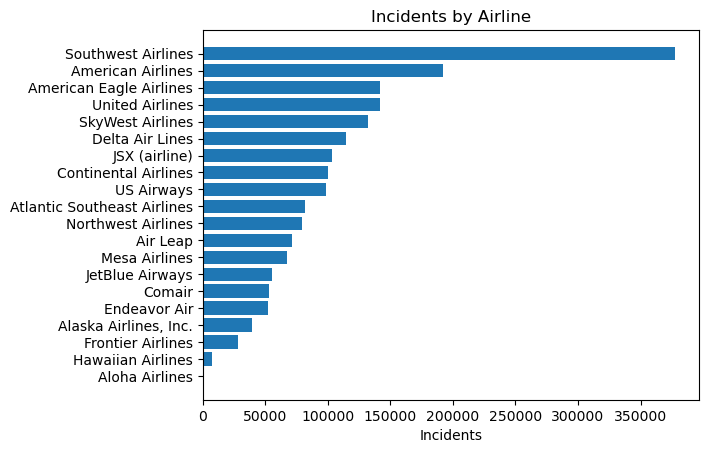

In [25]:
plt.rcdefaults()
fig, ax = plt.subplots()

# data
carriers = Totals_x_carrier.index.values
y_pos = np.arange(Totals_x_carrier.count())

ax.barh(y_pos, Totals_x_carrier, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(carriers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Incidents')
ax.set_title('Incidents by Airline')

plt.show()

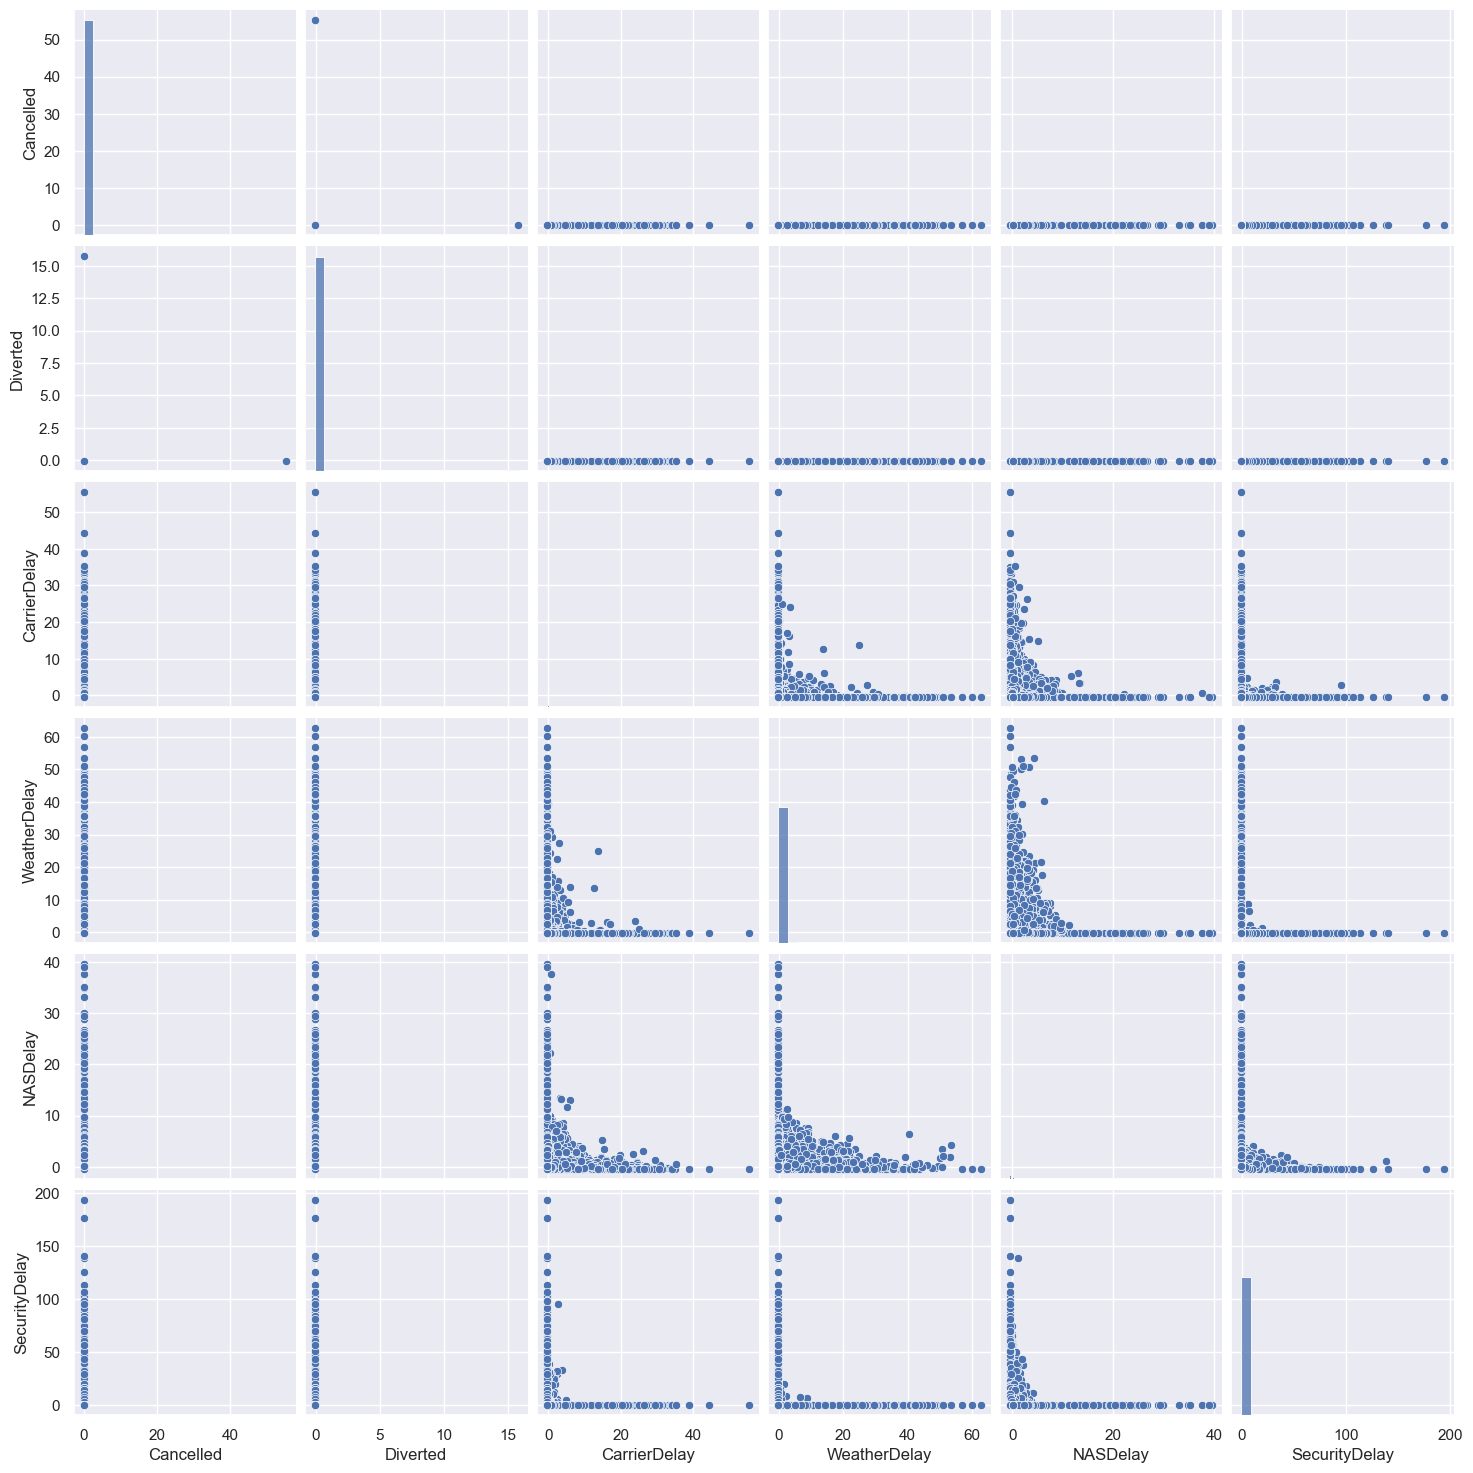

In [26]:
import seaborn as sns

sns.set()
sns.pairplot(df_estandarized.iloc[:,17:23], height = 2.5)
plt.show()

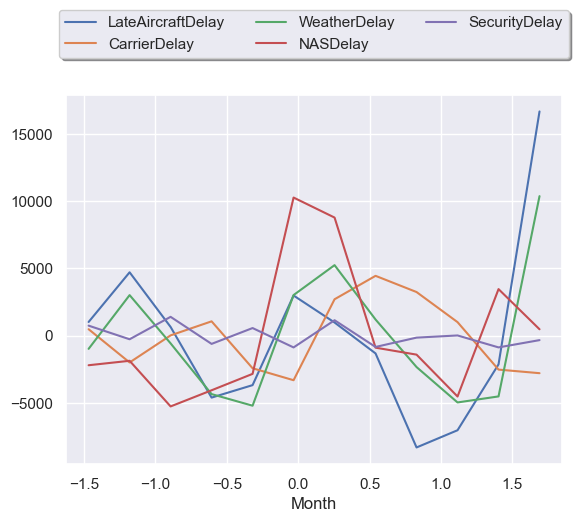

In [27]:
# Tipus de retras x mes 
df2 = df_estandarized.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')[['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()